<font size="15">Group Project<font>
- Jashan Bains (47733738)
- Priyansh Bahri (89605810)
-
- 

<font size= "5">Introduction:<font>

<font size= "5">Methods and Results:<font>

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(hashedEmail)`


average_total_playtime,average_total_age
<dbl>,<dbl>
94.21339,19.39651


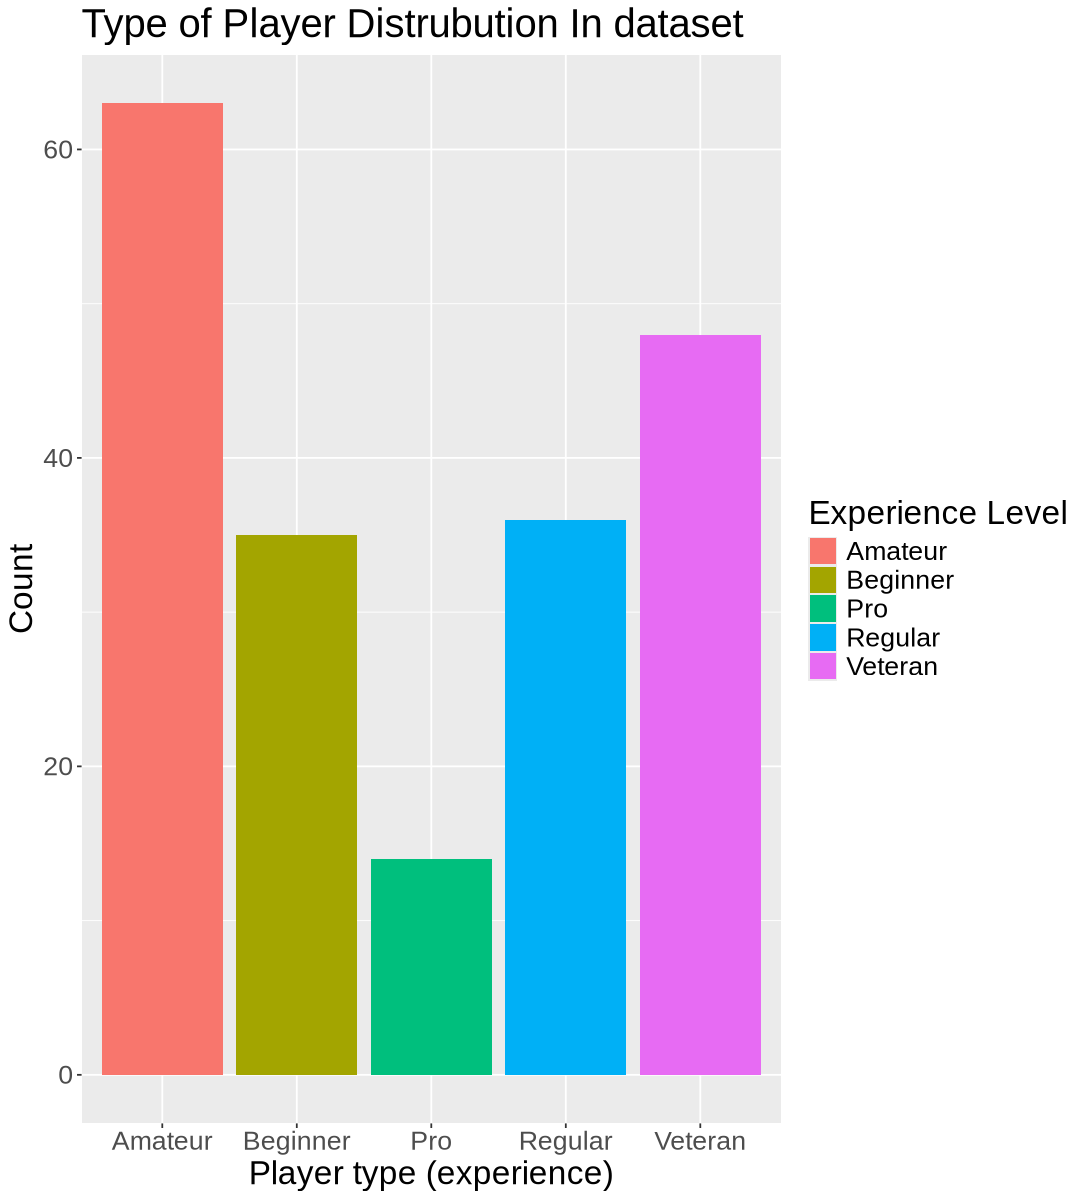

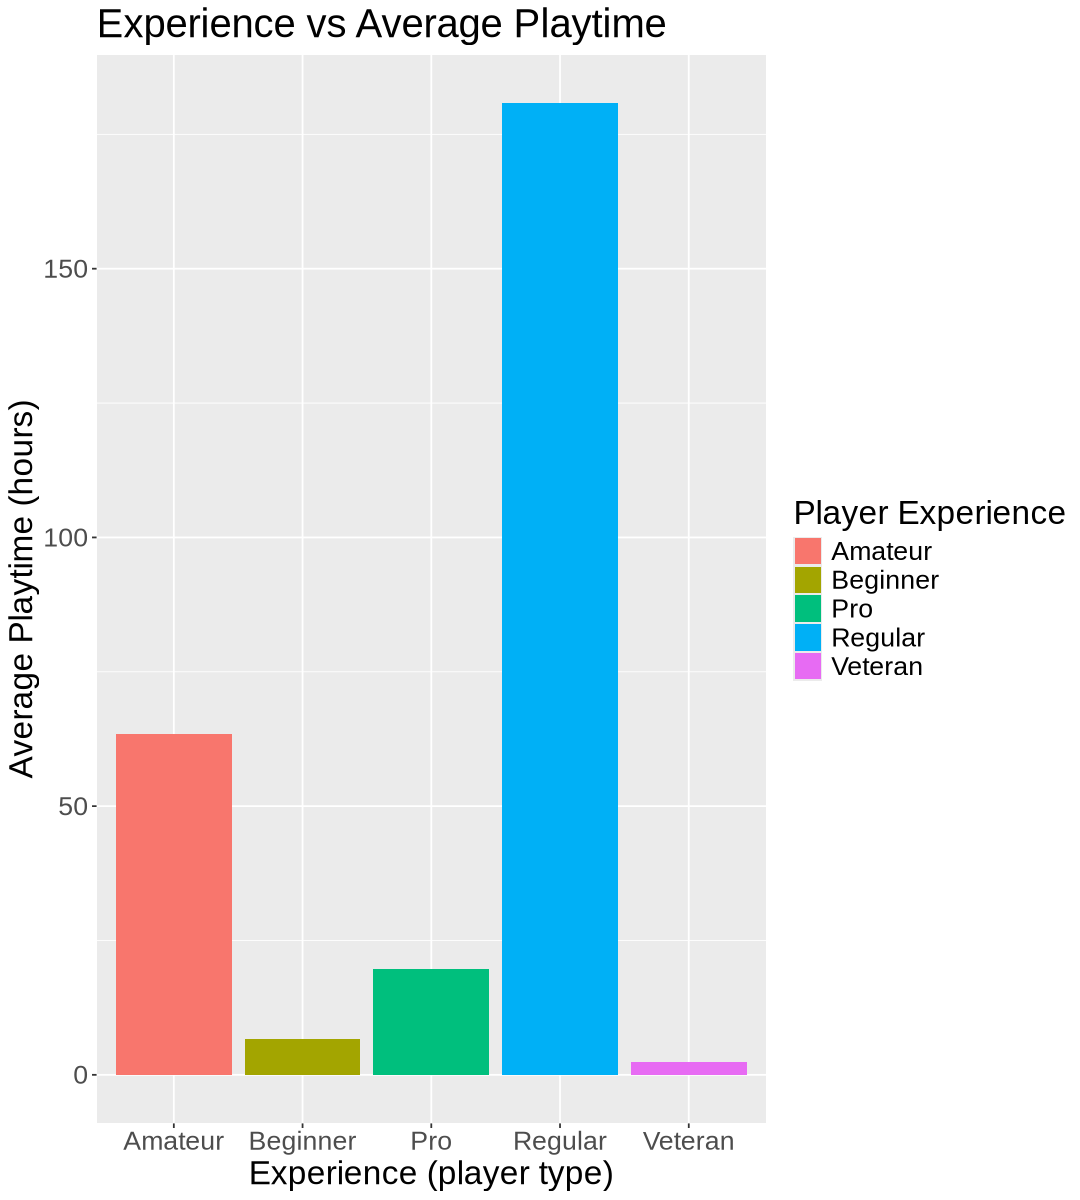

In [19]:
#loading in the needed libraries
library(tidyverse)
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)


#loading in the raw data
players_data <- read_csv ("https://raw.githubusercontent.com/jashanbains-24/DSCI-100-Group-Project/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/jashanbains-24/DSCI-100-Group-Project/refs/heads/main/sessions.csv")

#merging the two datasets with left_join which also grouped by hashedEmail
minecraft_data <- left_join(players_data,sessions_data)


#getting rid of not needed columns (unix time representation)
minecraft_data <- minecraft_data|>
                    select(-original_start_time,-original_end_time)



#tidying the start/end_time columns
minecraft_data <- minecraft_data|>
                    separate(start_time,into=c("start_date","start_time"),sep=" ")|>
                    separate(end_time,into=c("end_date","end_time"),sep=" ")


#average playtime and age
playtime_mean <-  minecraft_data|>
                    summarize(average_total_playtime=mean(played_hours,na.rm=TRUE),
                             average_total_age=mean(Age, na.rm=TRUE))

playtime_mean


options(repr.plot.width=9,repr.plot.height=10)
#visualizing the distribution of player types in the dataset
player_type_viz <- players_data|>
                    group_by(hashedEmail)|>
                    ggplot(aes(x = experience, fill = experience))+
                    geom_bar()+
                    labs(title="Type of Player Distrubution In dataset",
                         y="Count",
                         x="Player type (experience)",
                        fill="Experience Level")+
                        theme(text=element_text(size=20))


player_type_viz

#visualizing the relationship betwewen player type and hours played
experienceplaytime <- minecraft_data|>
                        group_by(experience)|>
                        summarize(avg_playtime=mean(played_hours,na.rm=TRUE))|>
                        ggplot(aes(x=experience,y=avg_playtime,fill=experience))+
                        geom_bar(stat="identity")+
                        labs(x="Experience (player type)",
                             y="Average Playtime (hours)",
                             title="Experience vs Average Playtime",
                             fill="Player Experience")+
                        theme(text=element_text(size=20))

experienceplaytime


# Performing Knn Classification for Data Analysis



<font size= "5">Discussion:<font>

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_date,start_time,end_date,end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024,00:21,08/08/2024,01:35
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024,22:30,09/09/2024,22:37
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024,02:41,08/08/2024,03:25
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,10/09/2024,15:07,10/09/2024,15:29
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,05/05/2024,22:21,05/05/2024,23:17
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,06/04/2024,22:24,06/04/2024,23:33


average_age,min_age,max_age,sd_age,average_total_playtime,min_total_playtime,max_total_playtime,sd_playtime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.39651,8,50,4.751322,94.21339,0,223.1,82.74086


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


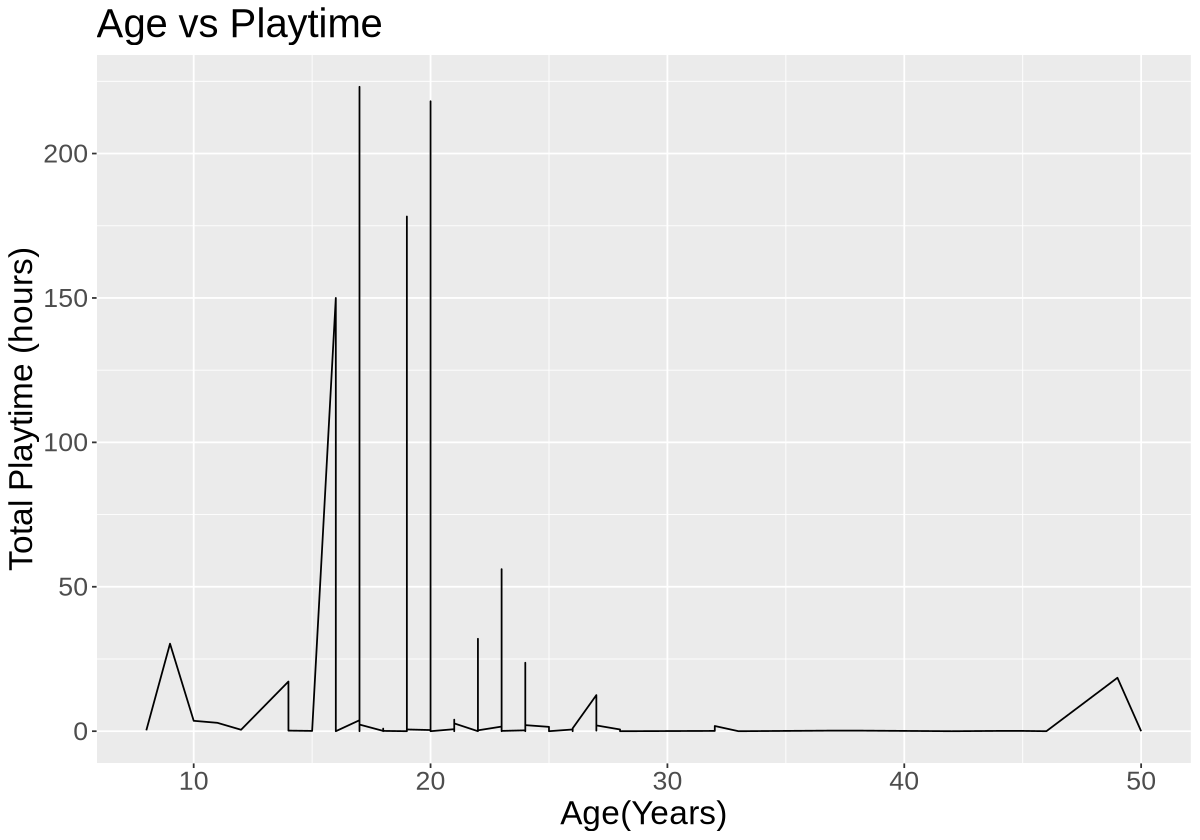

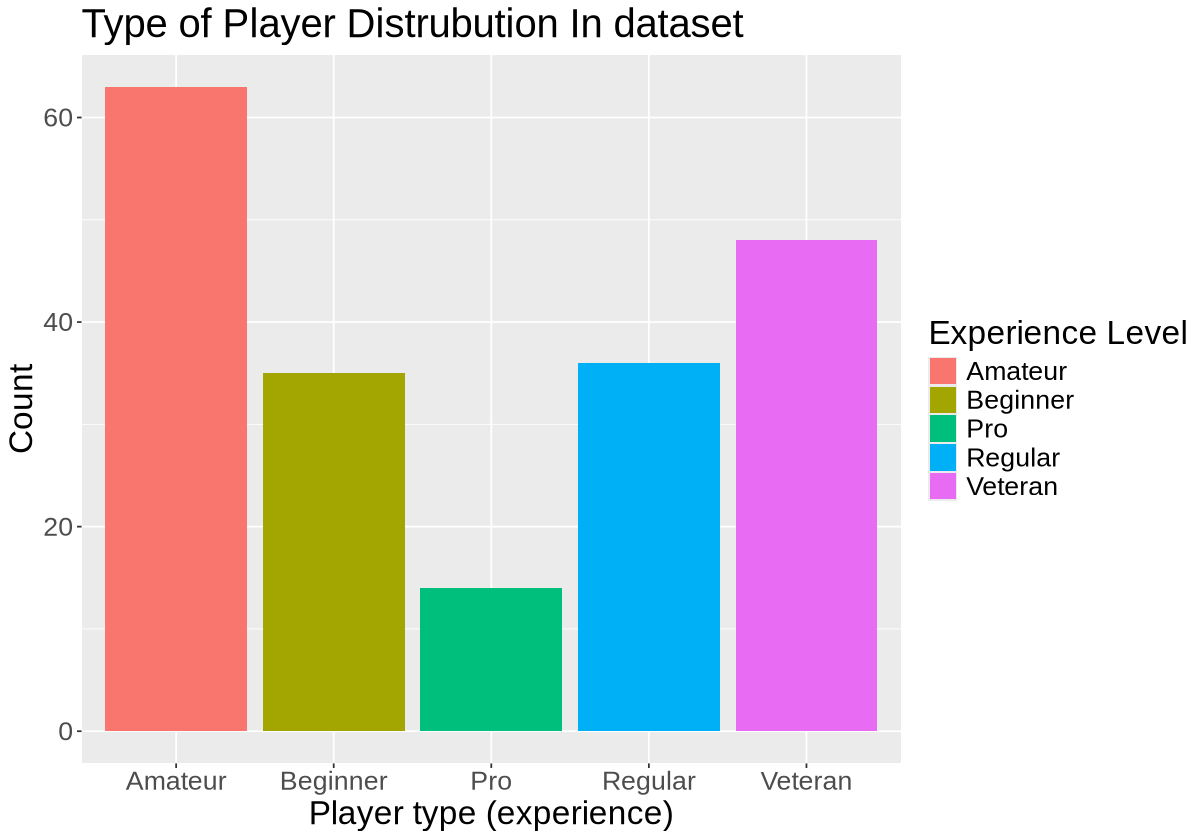

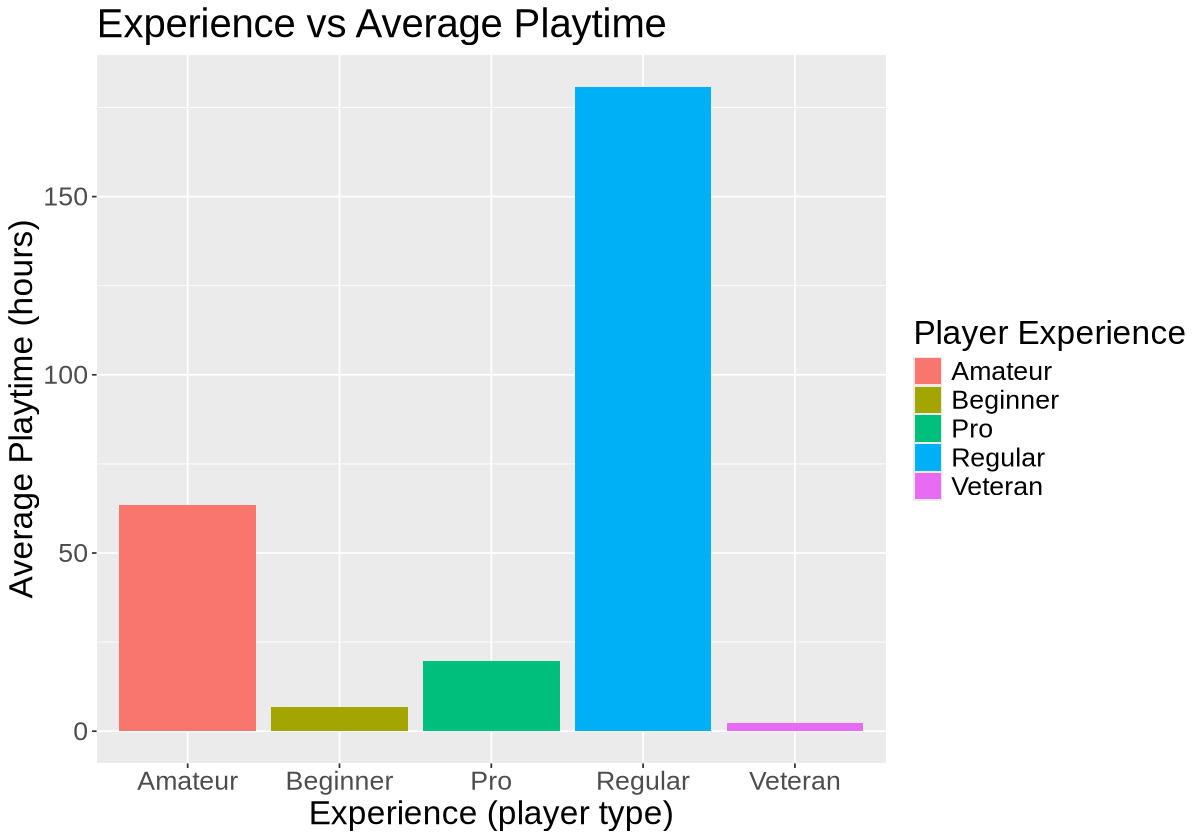

In [2]:






#Visualizations
options(repr.plot.width=10)
age_vs_hours <- minecraft_data|>
                ggplot(aes(x=Age,y=played_hours))+
                geom_line()+
                labs(x= "Age(Years)",
                     y="Total Playtime (hours)",
                     title="Age vs Playtime")+
                    theme(text=element_text(size=20))

age_vs_hours










<font size= "5">(4) Methods and Plan<font>

To predict player type based on engagement metrics, we will use K-Nearest Neighbors Classification. This model is the right choice for this analysis as it classifies player experience by comparing them to other entries with similar features, using played hours, sessions, and age.

**Assumptions**
- Similar Players need to exist in the dataset, will be needed for comparability for training our mdodel
- The straight line distance will reflect players accurately after scaling   and centering to ensure fair classification

**Limitations**
- One limitation is that this model can be fairly expensive in terms of computation as the dataset grows, and we are dealing with a large dataset. To battle this, it is crucial that we choose the right K through cross validation. This will optimize K and prevent over/underfitting.
- Another weakness is that there are some outliers in this dataset and if we choose the wrong K value, those might influence our classfication negatively (we need to ensure that we have the right K value)

**Comparing the Model**
- We will evaluate K values using cross-validation(5-10 fold) and compare using accuracy, precision and recall. This will ensure our model generalizes well and does not overfit to training data. We will then do the same with linear regression and comparing rmspe values to ensure that we have made the right choice going with classification.

- We will be splitting the data using an 80/20 training and testing split. We will apply 5 fold cross-validation. Then finally, we will use resulting value of K to make final predictions.